<a href="https://colab.research.google.com/github/diengiau/py18plus/blob/master/03_plotRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from pandas_datareader import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#plt.style.use('ggplot')

# 1. Download stock data

One public source of stock data is from Yahoo Finance. We can use `pandas` package to download data. Now, we need Apple Inc. and Russell 2000 daily close price.

First, visit the Yahoo Finance to find out the ticker:
- Apple: [AAPL](https://finance.yahoo.com/quote/AAPL?p=AAPL&.tsrc=fin-srch)
- Russel 2000: [^RUT](https://finance.yahoo.com/quote/%5ERUT?p=^RUT)


In [0]:
AAPL = data.DataReader("AAPL", start='2019-1-1', end='2019-12-31', data_source='yahoo')
RUT = data.DataReader("^RUT", start='2019-1-1', end='2019-12-31', data_source='yahoo')

In [0]:
type(AAPL), type(RUT)

(pandas.core.frame.DataFrame, pandas.core.frame.DataFrame)

We come to a new data type: a dataframe, which include:

- columns: each column is a variable
- rows: each row is one observation, e.g., one date's data

In [0]:
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.214005
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870


In [0]:
RUT.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-01-02,1357.770020,1325.180054,1346.109985,1355.910034,37331600,1355.910034
2019-01-03,1355.020020,1328.000000,1355.020020,1330.829956,38228600,1330.829956
2019-01-04,1383.160034,1333.099976,1333.099976,1380.750000,42134100,1380.750000
2019-01-07,1411.900024,1380.839966,1380.839966,1405.369995,41047100,1405.369995
2019-01-08,1426.550049,1404.010010,1405.869995,1426.550049,40810300,1426.550049


# 2. Calculate Returns

In [0]:
AAPL['Close']

Date
2019-01-02    157.919998
2019-01-03    142.190002
2019-01-04    148.259995
2019-01-07    147.929993
2019-01-08    150.750000
                 ...    
2019-12-24    284.269989
2019-12-26    289.910004
2019-12-27    289.799988
2019-12-30    291.519989
2019-12-31    293.649994
Name: Close, Length: 252, dtype: float64

In [0]:
AAPL['Close'].shift(1)

Date
2019-01-02           NaN
2019-01-03    157.919998
2019-01-04    142.190002
2019-01-07    148.259995
2019-01-08    147.929993
                 ...    
2019-12-24    284.000000
2019-12-26    284.269989
2019-12-27    289.910004
2019-12-30    289.799988
2019-12-31    291.519989
Name: Close, Length: 252, dtype: float64

In [0]:
AAPL['logReturn'] = np.log(AAPL['Close'] / AAPL['Close'].shift(1)) # log return
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,logReturn
Date,,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.214005,NaN
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540,-0.104924
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513,0.041803
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203,-0.002228
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870,0.018884


In [0]:
(AAPL['Close'] - AAPL['Close'].shift(1))/AAPL['Close'].shift(1) # log return

Date
2019-01-02         NaN
2019-01-03   -0.099607
2019-01-04    0.042689
2019-01-07   -0.002226
2019-01-08    0.019063
                ...   
2019-12-24    0.000951
2019-12-26    0.019840
2019-12-27   -0.000379
2019-12-30    0.005935
2019-12-31    0.007307
Name: Close, Length: 252, dtype: float64

In [0]:
AAPL['simpleReturn'] = AAPL['Close'].pct_change() # simple return
AAPL['cumReturn'] = ((1 + AAPL['logReturn']).cumprod() - 1)
AAPL.head()

,High,Low,Open,Close,Volume,Adj Close,logReturn,simpleReturn,cumReturn
Date,,,,,,,,,
2019-01-02,158.850006,154.229996,154.889999,157.919998,37039700.0,155.214005,NaN,NaN,NaN
2019-01-03,145.720001,142.000000,143.979996,142.190002,91312200.0,139.753540,-0.104924,-0.099607,-0.104924
2019-01-04,148.550003,143.800003,144.529999,148.259995,58607100.0,145.719513,0.041803,0.042689,-0.067507
2019-01-07,148.830002,145.899994,148.699997,147.929993,54777800.0,145.395203,-0.002228,-0.002226,-0.069585
2019-01-08,151.820007,148.520004,149.559998,150.750000,41025300.0,148.166870,0.018884,0.019063,-0.052016


We also calculate market returns too:


In [0]:
RUT['marketReturn'] = np.log(RUT['Close'] / RUT['Close'].shift(1)) 
RUT

,High,Low,Open,Close,Volume,Adj Close,marketReturn
Date,,,,,,,
2019-01-02,1357.770020,1325.180054,1346.109985,1355.910034,37331600,1355.910034,NaN
2019-01-03,1355.020020,1328.000000,1355.020020,1330.829956,38228600,1330.829956,-0.018670
2019-01-04,1383.160034,1333.099976,1333.099976,1380.750000,42134100,1380.750000,0.036824
2019-01-07,1411.900024,1380.839966,1380.839966,1405.369995,41047100,1405.369995,0.017674
2019-01-08,1426.550049,1404.010010,1405.869995,1426.550049,40810300,1426.550049,0.014958
...,...,...,...,...,...,...,...
2019-12-24,1678.089966,1673.739990,1676.229980,1678.010010,12965400,1678.010010,0.002309
2019-12-26,1680.359985,1675.099976,1680.219971,1677.670044,21606800,1677.670044,-0.000203
2019-12-27,1681.680054,1666.430054,1681.250000,1669.030029,24286700,1669.030029,-0.005163


# 3. Correlation in DataFrame

We merge stock and market returns and discover the correlation between them.

In [0]:
df = pd.merge(AAPL[['logReturn', 'simpleReturn', 'cumReturn']], 
                RUT['marketReturn'],
                left_index=True,
                right_index=True)

In [0]:
df.head()

,logReturn,simpleReturn,cumReturn,marketReturn
Date,,,,
2019-01-02,NaN,NaN,NaN,NaN
2019-01-03,-0.104924,-0.099607,-0.104924,-0.018670
2019-01-04,0.041803,0.042689,-0.067507,0.036824
2019-01-07,-0.002228,-0.002226,-0.069585,0.017674
2019-01-08,0.018884,0.019063,-0.052016,0.014958


In [0]:
df = df[1:]
df

,logReturn,simpleReturn,cumReturn,marketReturn
Date,,,,
2019-01-03,-0.104924,-0.099607,-0.104924,-0.018670
2019-01-04,0.041803,0.042689,-0.067507,0.036824
2019-01-07,-0.002228,-0.002226,-0.069585,0.017674
2019-01-08,0.018884,0.019063,-0.052016,0.014958
2019-01-09,0.016839,0.016982,-0.036052,0.008557
...,...,...,...,...
2019-12-24,0.000950,0.000951,0.737500,0.002309
2019-12-26,0.019646,0.019840,0.771635,-0.000203
2019-12-27,-0.000380,-0.000379,0.770963,-0.005163


Correlation between variables:

In [0]:
df.corr()

,logReturn,simpleReturn,cumReturn,marketReturn
logReturn,1.000000,0.999707,0.093883,0.628305
simpleReturn,0.999707,1.000000,0.089952,0.628603
cumReturn,0.093883,0.089952,1.000000,0.007580
marketReturn,0.628305,0.628603,0.007580,1.000000


# 4. Plots for data analysis

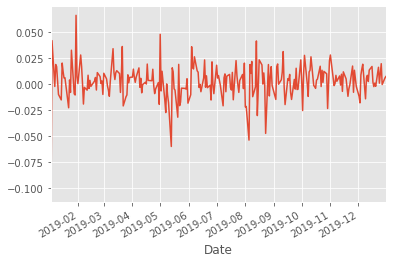

In [0]:
df['logReturn'].plot()

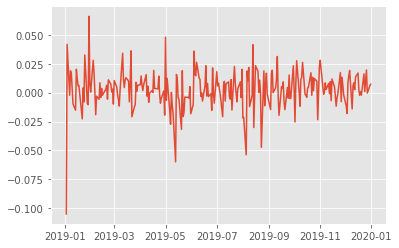

In [0]:
plt.plot(df.logReturn)

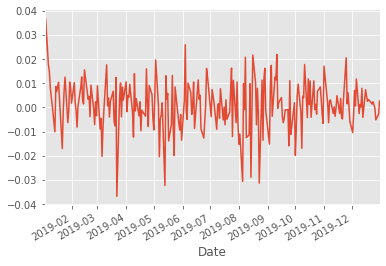

In [0]:
df['marketReturn'].plot()

Histogram plots:

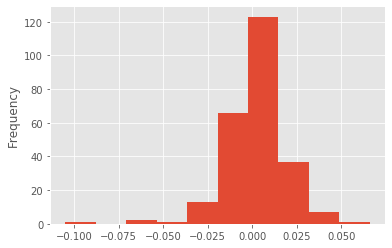

In [0]:
df['logReturn'].plot.hist()

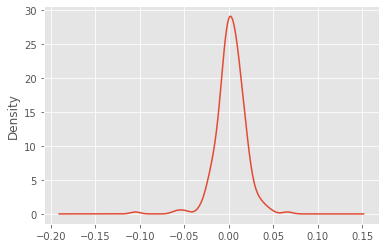

In [0]:
df['logReturn'].plot.density()

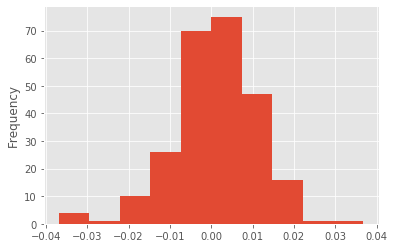

In [0]:
df['marketReturn'].plot.hist()

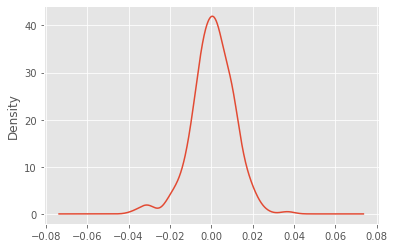

In [0]:
df['marketReturn'].plot.density()

A scatter plot between stock return and the market return.

Text(0.5, 1.0, 'Changes in stock return versus market return')

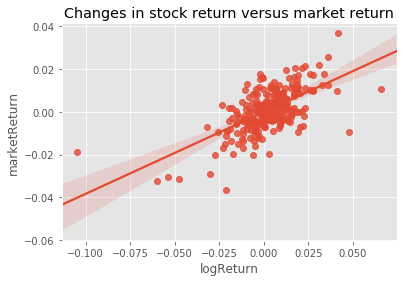

In [0]:
import seaborn as sns
sns.regplot('logReturn', 'marketReturn', data=df)
plt.title('Changes in %s versus %s' % ('stock return', 'market return'))

Lastly, we can draw a pairplot too, which includes almost everything about a dataframe:

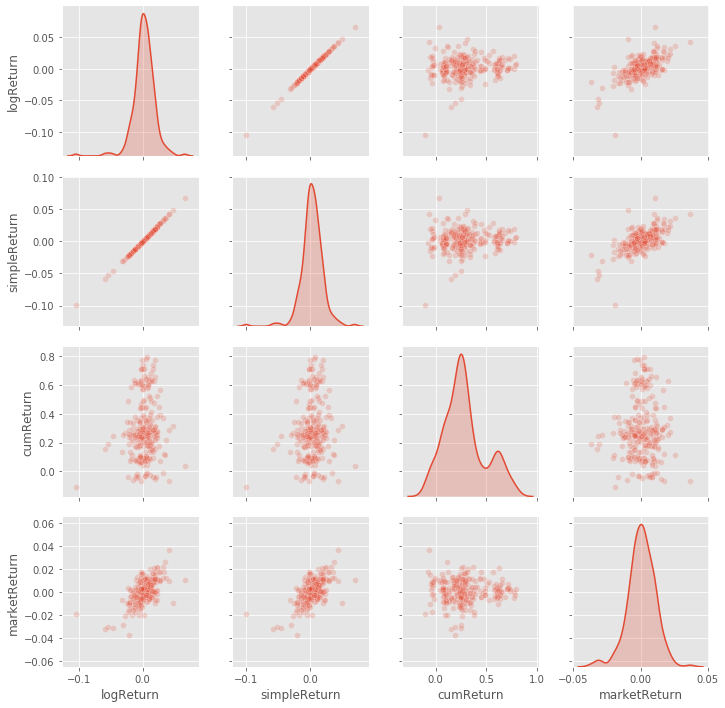

In [0]:
sns.pairplot(df, diag_kind='kde', plot_kws={'alpha': 0.2})

# 5. Regression

We will run a regression between the stock return and the market return, including an intercept:

In [0]:
import statsmodels.formula.api as smf
results = smf.ols('logReturn ~ marketReturn', data=df).fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              logReturn   R-squared:                       0.395
Model:                            OLS   Adj. R-squared:                  0.392
Method:                 Least Squares   F-statistic:                     162.4
Date:                Fri, 31 Jan 2020   Prob (F-statistic):           5.65e-29
Time:                        14:37:54   Log-Likelihood:                 735.67
No. Observations:                 251   AIC:                            -1467.
Df Residuals:                     249   BIC:                            -1460.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.0016      0.001      1.973   

In [0]:
results.params

Intercept       0.001619
marketReturn    1.031300
dtype: float64

In [0]:
results.tvalues

Intercept        1.972621
marketReturn    12.744086
dtype: float64

In [0]:
results.predict(df) # fitted value

Date
2019-01-03   -0.017635
2019-01-04    0.039596
2019-01-07    0.019846
2019-01-08    0.017046
2019-01-09    0.010444
                ...   
2019-12-24    0.004000
2019-12-26    0.001410
2019-12-27   -0.003706
2019-12-30   -0.001401
2019-12-31    0.004293
Length: 251, dtype: float64

In [0]:
results.predict(df) - df['logReturn']

Date
2019-01-03    0.087289
2019-01-04   -0.002208
2019-01-07    0.022074
2019-01-08   -0.001838
2019-01-09   -0.006395
                ...   
2019-12-24    0.003050
2019-12-26   -0.018236
2019-12-27   -0.003326
2019-12-30   -0.007318
2019-12-31   -0.002987
Length: 251, dtype: float64